In [40]:
#libraries and framework
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,normalize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import svm

In [2]:
dat=pd.read_csv(r'D:\wine\winequality-red.csv',sep=";")

In [3]:
dat.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dat.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
dat.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


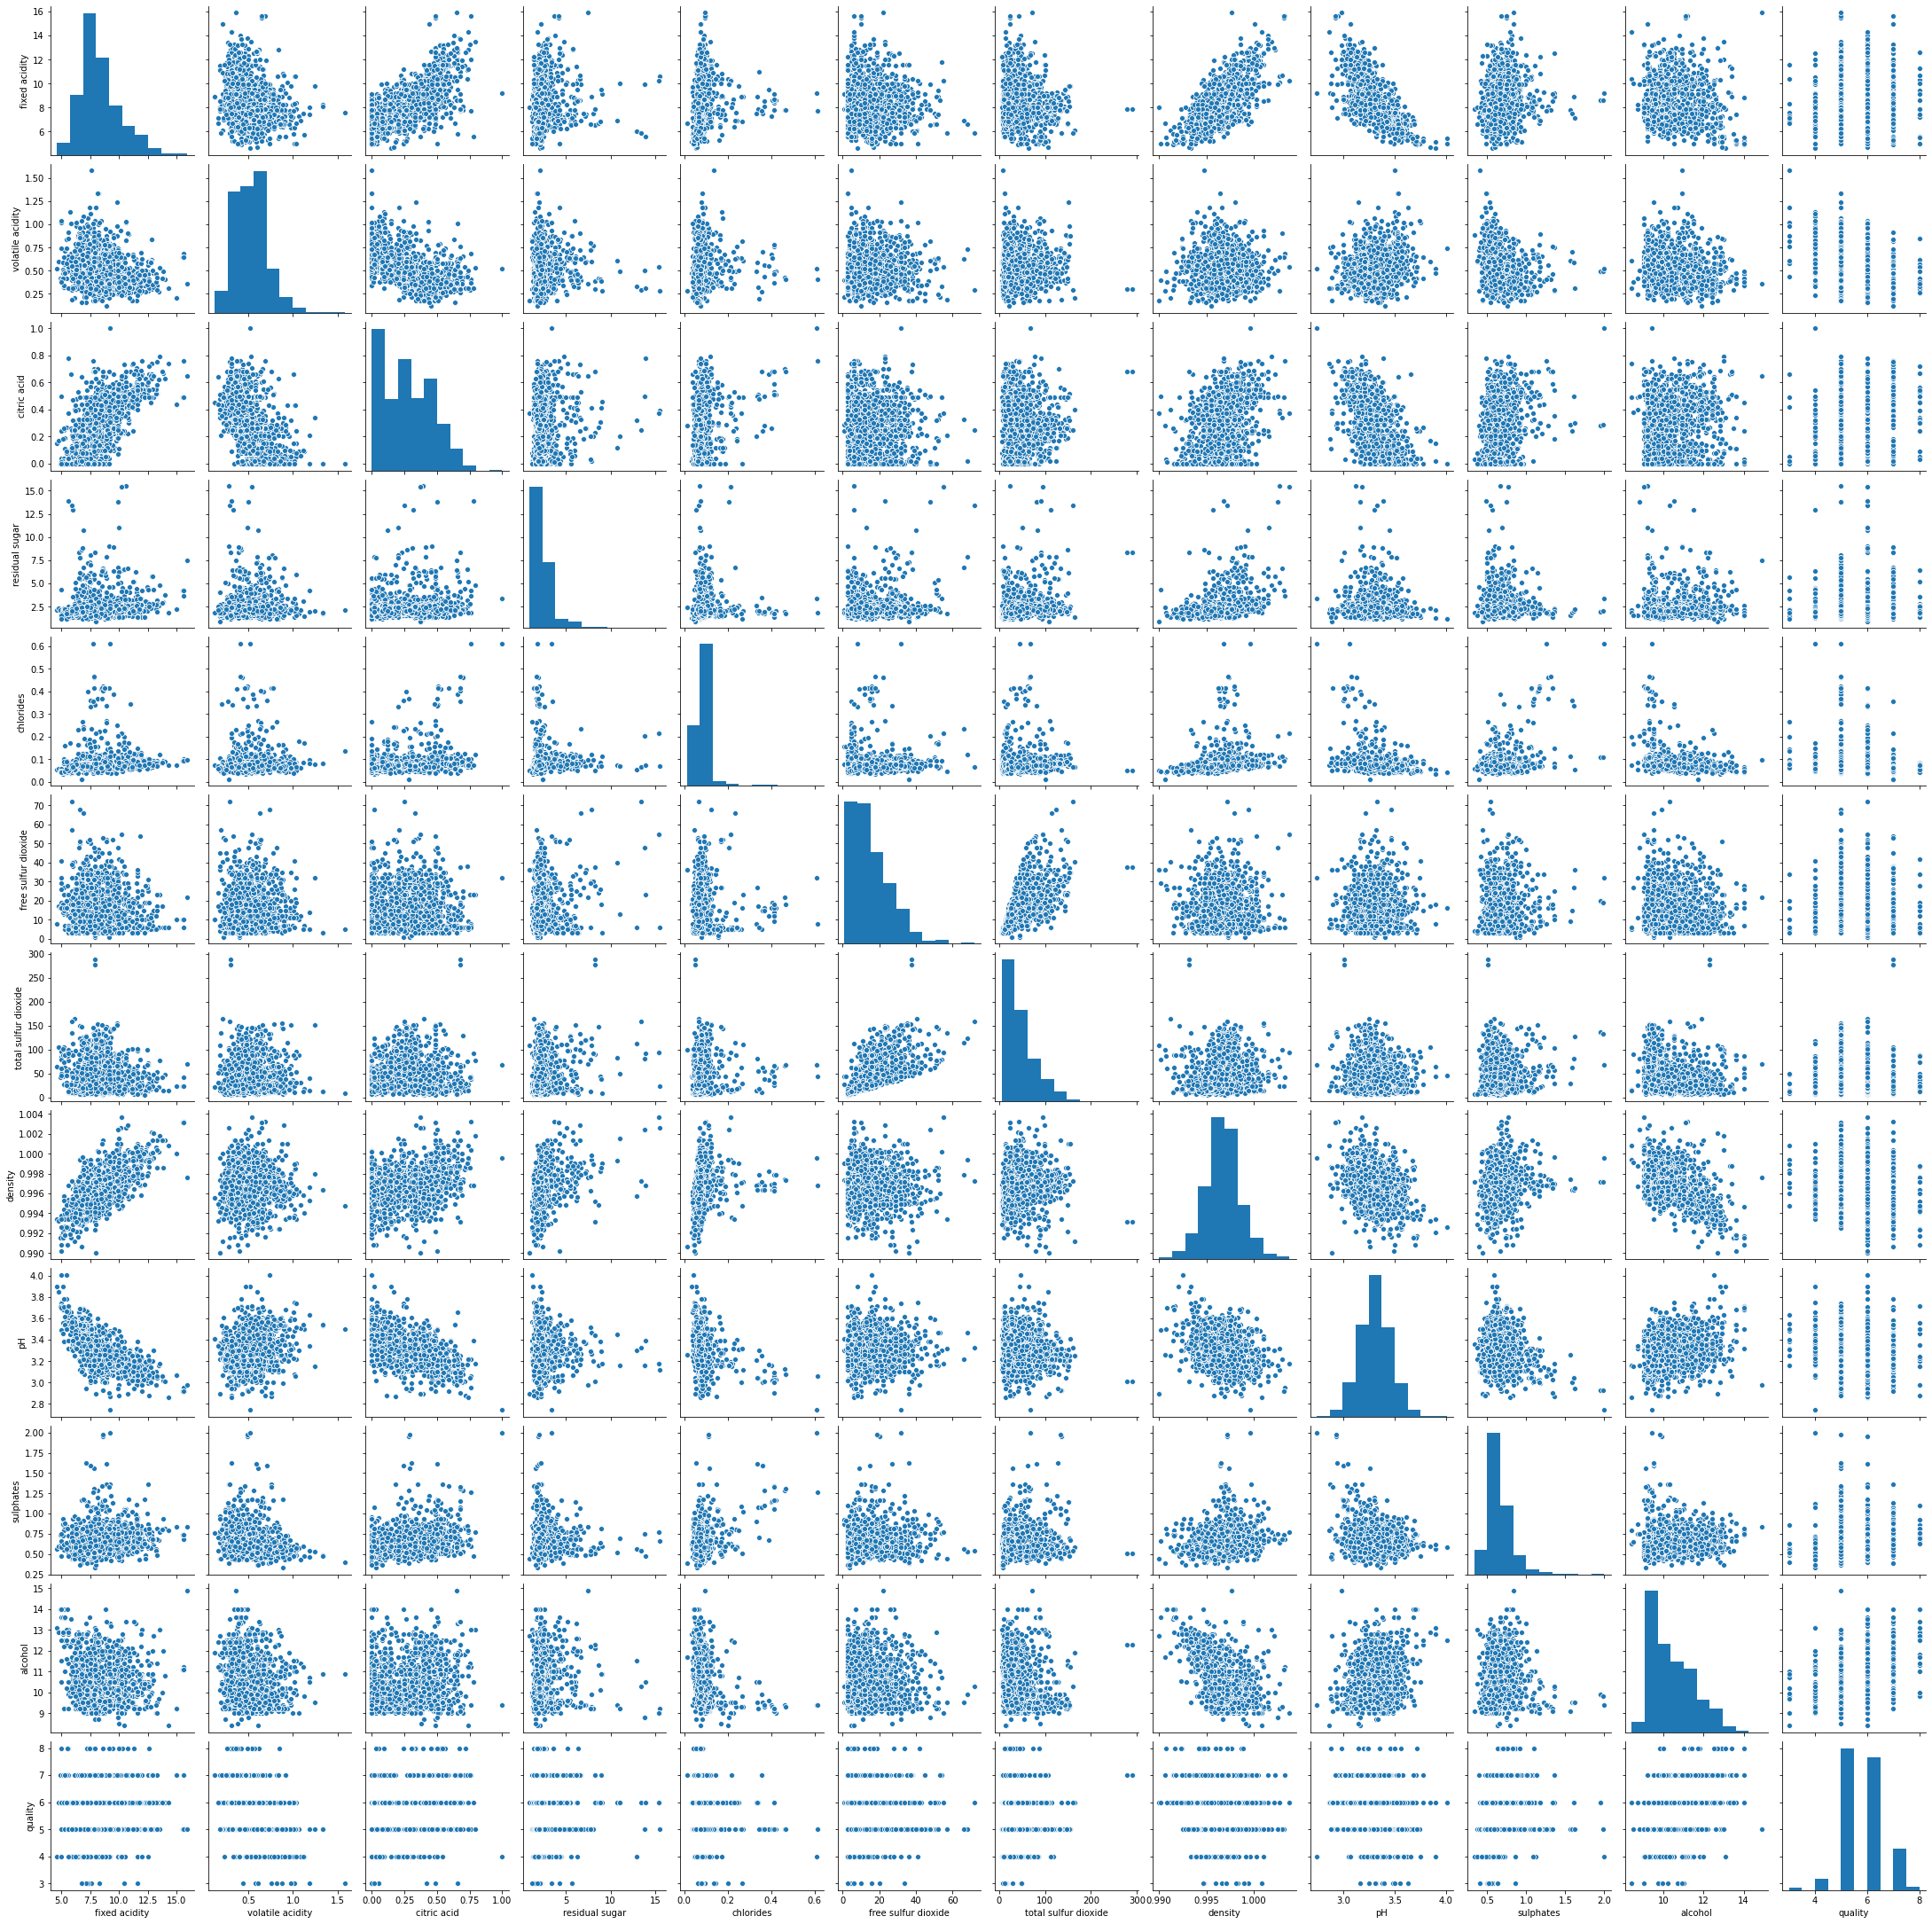

In [7]:
#relation between columns using corelation graph
sns.pairplot(dat)

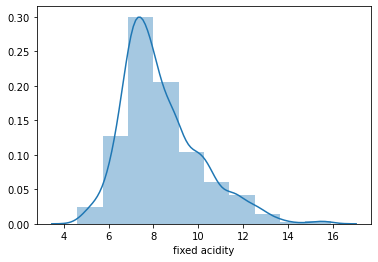

In [61]:
#distribution of fixed acidity values
sns.distplot(dat['fixed acidity'],bins=10)

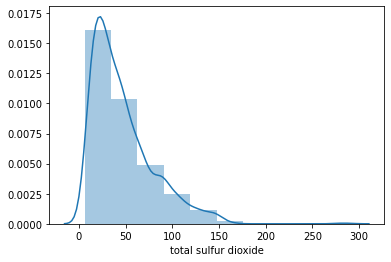

In [8]:
#distribution of total sulfur dioxide values

sns.distplot(dat['total sulfur dioxide'],bins=10)

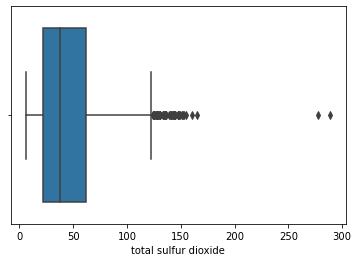

In [9]:
sns.boxplot(dat['total sulfur dioxide'])

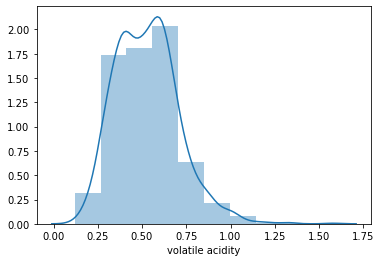

In [10]:
sns.distplot(dat['volatile acidity'],bins=10)

In [11]:
dat['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
for i in dat.columns:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [14]:
#mean values of each column with respect to label quality in increasing order
for i in dat.columns:
    if i!='quality':
        print(dat[[i,"quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality"))

   quality  fixed acidity
0        3       8.360000
1        4       7.779245
2        5       8.167254
3        6       8.347179
4        7       8.872362
5        8       8.566667
   quality  volatile acidity
0        3          0.884500
1        4          0.693962
2        5          0.577041
3        6          0.497484
4        7          0.403920
5        8          0.423333
   quality  citric acid
0        3     0.171000
1        4     0.174151
2        5     0.243686
3        6     0.273824
4        7     0.375176
5        8     0.391111
   quality  residual sugar
0        3        2.635000
1        4        2.694340
2        5        2.528855
3        6        2.477194
4        7        2.720603
5        8        2.577778
   quality  chlorides
0        3   0.122500
1        4   0.090679
2        5   0.092736
3        6   0.084956
4        7   0.076588
5        8   0.068444
   quality  free sulfur dioxide
0        3            11.000000
1        4            12.264151
2       

In [15]:
dat["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

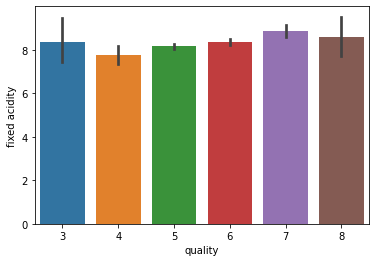

In [16]:
sns.barplot(dat['quality'],dat['fixed acidity'])

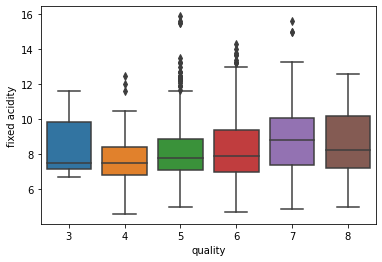

In [17]:
sns.boxplot(dat['quality'],dat['fixed acidity'])

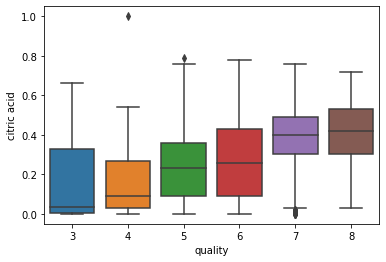

In [19]:
sns.boxplot(dat['quality'],dat['citric acid'])

In [24]:

#finding number of data points for each unique value of quality
dic={}

for i in dat['quality']:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=0

    

In [25]:
print(dic)

{5: 680, 6: 637, 7: 198, 4: 52, 8: 17, 3: 9}


In [14]:
# ofcourse the given data set is inbalanced

In [26]:
dat.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

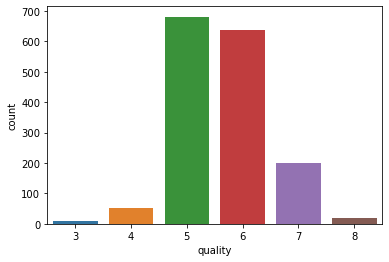

In [27]:
sns.countplot(dat['quality'],data=dat)

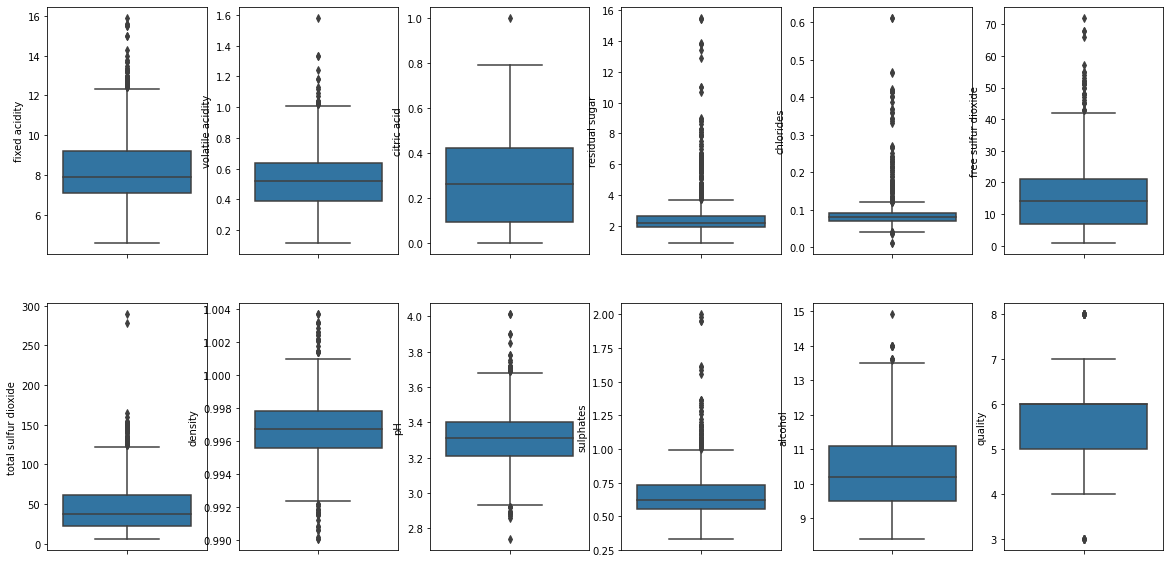

In [28]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
ax = ax.flatten()
index=0
for col, value in dat.items():
    sns.boxplot(y=col, data=dat,ax=ax[index])
    index += 1

In [29]:
#removing of outliers using the method of quariltiles
Q1 = dat.quantile(0.25)
Q3 = dat.quantile(0.75)
IQR = Q3 - Q1
dat = dat[~((dat < (Q1 - 1.5 * IQR)) |(dat > (Q3 + 1.5 * IQR))).any(axis=1)]


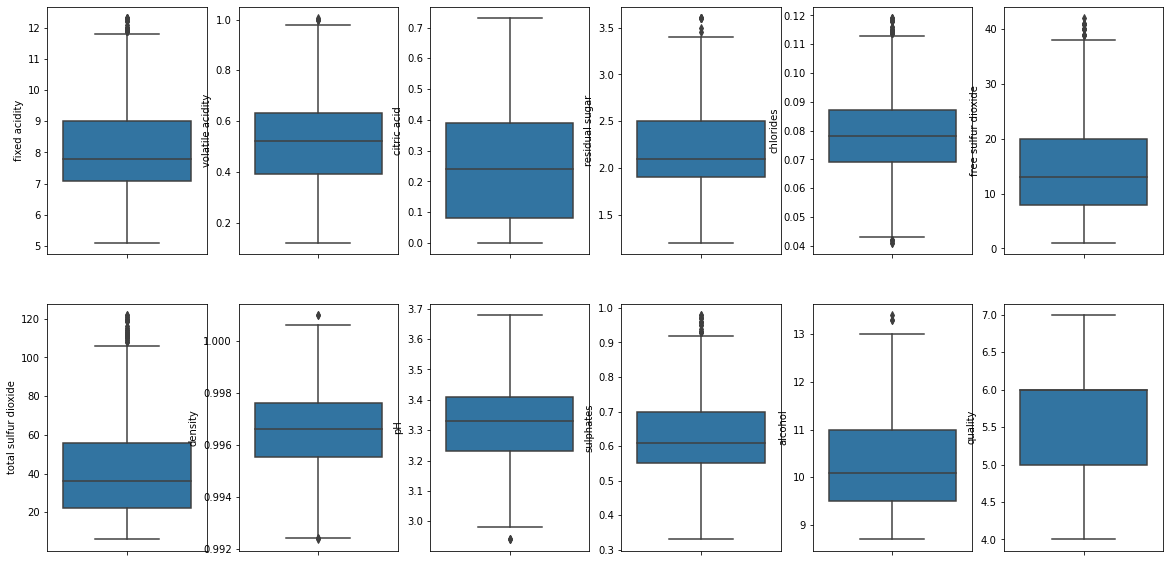

In [30]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
ax = ax.flatten()
index=0
for col, value in dat.items():
    sns.boxplot(y=col, data=dat,ax=ax[index])
    index += 1

In [31]:
#now finally imolementing models
#doing smote analaysis for handling the imbalanced class
#svm classifier
#descion tree classifier 
#random forest classisfier

In [32]:
X=dat.drop('quality',axis=1)
Y=dat['quality']

In [33]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [34]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1179, dtype: int64

In [35]:
def classify(X,Y,model):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=2)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    score = cross_val_score(model, X, Y, cv=5)
    print("CV Score:", np.mean(score)*100)
    print(classification_report(y_test,y_pred))

In [36]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
# transform the dataset
x, y = oversample.fit_resample(X, Y)

In [28]:
#implemantation using svm classifier

In [41]:
from sklearn.svm import SVC # "Support vector classifier" before smote analaysiss  
classifier = SVC(kernel='poly')  
classify(X,Y,classifier) 

0.46153846153846156
CV Score: 48.2585647313379
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.58      0.22      0.32       170
           6       0.44      0.87      0.58       164
           7       0.00      0.00      0.00        45

    accuracy                           0.46       390
   macro avg       0.26      0.27      0.23       390
weighted avg       0.44      0.46      0.39       390



C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
classify(x,y,classifier) #svm after smote analaysis

0.415929203539823
CV Score: 40.05708860008308
              precision    recall  f1-score   support

           4       0.36      0.96      0.53       169
           5       0.60      0.20      0.30       156
           6       0.50      0.10      0.17       176
           7       0.50      0.40      0.44       177

    accuracy                           0.42       678
   macro avg       0.49      0.42      0.36       678
weighted avg       0.49      0.42      0.36       678



In [43]:
classifier = SVC(kernel='rbf') #svm before smote analaysis using rbf kernal 
classify(X,Y,classifier) 

0.4794871794871795
CV Score: 49.95708618824377
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.55      0.42      0.48       170
           6       0.44      0.70      0.54       164
           7       0.00      0.00      0.00        45

    accuracy                           0.48       390
   macro avg       0.25      0.28      0.26       390
weighted avg       0.43      0.48      0.44       390



C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
classifier = SVC(kernel='rbf') #svm after smote analaysis using rbf kernal   
classify(x,y,classifier) 

0.43805309734513276
CV Score: 45.1225446561035
              precision    recall  f1-score   support

           4       0.46      0.60      0.52       169
           5       0.39      0.34      0.36       156
           6       0.33      0.29      0.31       176
           7       0.54      0.52      0.53       177

    accuracy                           0.44       678
   macro avg       0.43      0.44      0.43       678
weighted avg       0.43      0.44      0.43       678



In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
classify(X,Y,DecisionTreeClassifier()) 

0.5974358974358974
CV Score: 47.49765596826542
              precision    recall  f1-score   support

           4       0.25      0.27      0.26        11
           5       0.66      0.60      0.63       170
           6       0.57      0.66      0.62       164
           7       0.58      0.42      0.49        45

    accuracy                           0.60       390
   macro avg       0.51      0.49      0.50       390
weighted avg       0.60      0.60      0.60       390



In [46]:
classify(x,y,DecisionTreeClassifier()) ##descion tree before smote analaysis

0.7433628318584071
CV Score: 66.960299092042
              precision    recall  f1-score   support

           4       0.87      0.93      0.90       169
           5       0.66      0.69      0.67       156
           6       0.61      0.59      0.60       176
           7       0.82      0.77      0.79       177

    accuracy                           0.74       678
   macro avg       0.74      0.74      0.74       678
weighted avg       0.74      0.74      0.74       678



In [47]:
classify(X,Y,RandomForestClassifier()) #random forest before smote analaysis

0.6692307692307692
CV Score: 59.28633249188604
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.70      0.74      0.72       170
           6       0.64      0.73      0.68       164
           7       0.70      0.36      0.47        45

    accuracy                           0.67       390
   macro avg       0.51      0.46      0.47       390
weighted avg       0.65      0.67      0.65       390



C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
classify(x,y,RandomForestClassifier()) #random forest after smote analaysis

0.8244837758112095
CV Score: 74.02409352560679
              precision    recall  f1-score   support

           4       0.92      0.99      0.96       169
           5       0.73      0.76      0.75       156
           6       0.76      0.58      0.66       176
           7       0.85      0.96      0.90       177

    accuracy                           0.82       678
   macro avg       0.82      0.82      0.82       678
weighted avg       0.82      0.82      0.82       678

